In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from collections import defaultdict
import folium

import matplotlib.pyplot as plt
%matplotlib inline

from library import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
cbre_metro = 'Denver'
cbre = import_cbre(cbre_metro)
zillow_metro = 'Denver-Aurora-Lakewood'
zillow = import_zillow(zillow_metro)

In [13]:
# plot_missing(zillow)

In [14]:
zillow_info,zillow_ts = split_zillow(zillow)
change = get_change(zillow_ts)

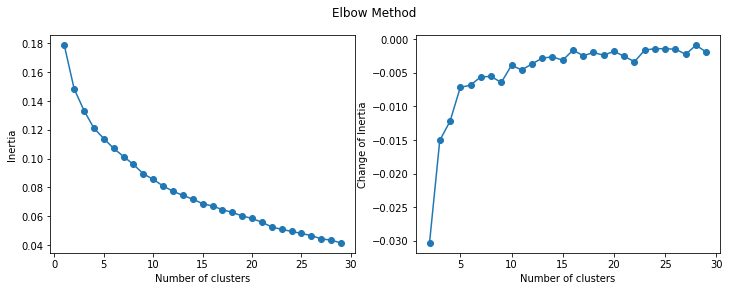

In [15]:
kmeans = KMeans(n_init=40)

plot_inertia(kmeans, change, range(1, 30))

In [28]:
# ncluster = zillow_info.CountyName.nunique()
# ncluster = cbre.submktname.nunique()
ncluster = 5
km_predict = fit_kmeans(ncluster, change, kmeans)

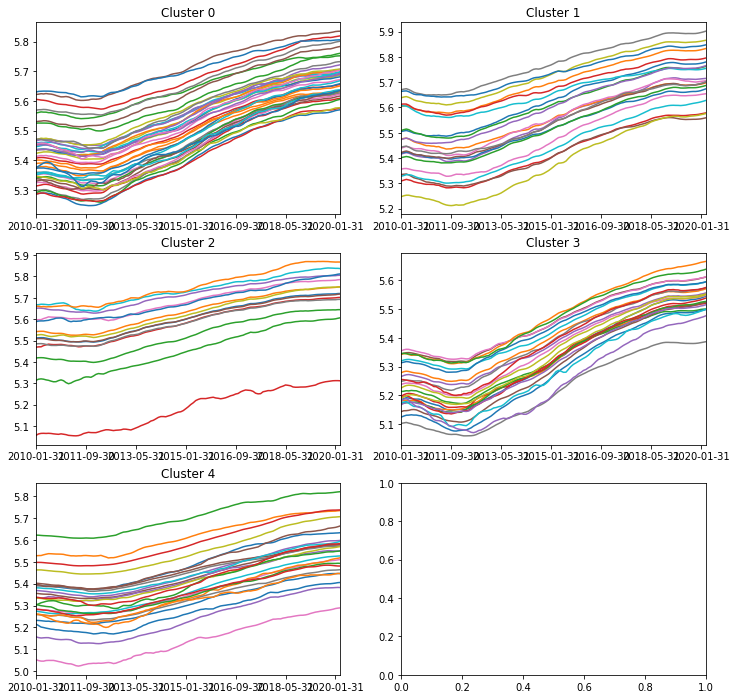

In [33]:
plot_clusters(km_predict,zillow_ts)

In [35]:
geojson = f'../data/co_colorado_zip_codes_geo.min.json'
coor = [39.6000, -104.9903]

geo_map = make_map(geojson,coor,ncluster,km_predict)
# geo_map
# geo_map.save('../fig/Denver_geo_map.html')

Plot cbre map?